# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [334]:
#Libraries


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#library to split data
from sklearn.model_selection import train_test_split

#To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import metrics

#Tune diferent Model
from sklearn.model_selection import GridSearchCV

#To get different metric scores
from sklearn.metrics import ( 
        f1_score,accuracy_score,recall_score,precision_score,confusion_matrix,make_scorer,
        )

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [49]:
Loan = pd.read_csv("~/downloads/Loan_Modelling.csv")
data = Loan.copy()

In [335]:
#Get the shape of the data to know the list of rows and columsn in the dataset
data.shape

(5000, 14)

In [51]:
#the command helps to provide the statistical inference of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Observations ## 

1. The value of the ZIPCode is not categorical as it has multiple values, we would need to change them into categorical and would need some data processing. 


In [52]:
#info command provides the number of null values present in each column of the dataset. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [53]:
data.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [54]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Data Pre Processing #

In [56]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

## Observation ##

1. The array shows the experience have negative values, we need some data processing to change the negative to positive as it seems to be an error in the dataset which is mis-guiding. 

In [57]:
data[data["Experience"]<0]["Experience"].unique()

array([-1, -2, -3])

In [58]:
data["Experience"].replace(-1,1,inplace=True)
data["Experience"].replace(-2,2,inplace=True)
data["Experience"].replace(-3,3,inplace=True)

# Feature Engineering # 

In [59]:
data["ZIPCode"].nunique()

467

In [60]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"]=data["ZIPCode"].str[0:2]
data["ZIPCode"]=data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


## Observation ##  

1. The ZIPCode values are split using the first 2 values and yielded 7 unique values. 

In [64]:
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]

data[cat_cols] = data[cat_cols].astype("category")

## Observation ##  

1. Convert all the required columns to "catgory" data type as it would be required when running the Decision Tree Classifier

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 308.8 KB


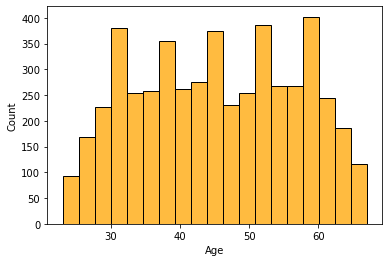

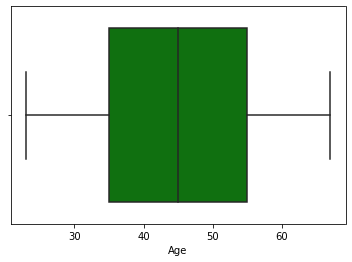

In [76]:
sns.histplot(data=data, x='Age',color='orange')
plt.show()
sns.boxplot(data=data, x='Age',color='green')
plt.show()

## Observation ##  

1. The above observation shows the univariate analysis of the distribution on Age column

In [79]:
# Extract the Age column
age = data['Income']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = age.quantile(0.25)
Q3 = age.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = age[(age < lower_bound) | (age > upper_bound)]

print(f'Outliers:\n{outliers}')

Outliers:
18      193
47      194
53      190
59      188
303     195
       ... 
4659    199
4670    194
4895    201
4981    195
4993    218
Name: Income, Length: 96, dtype: int64


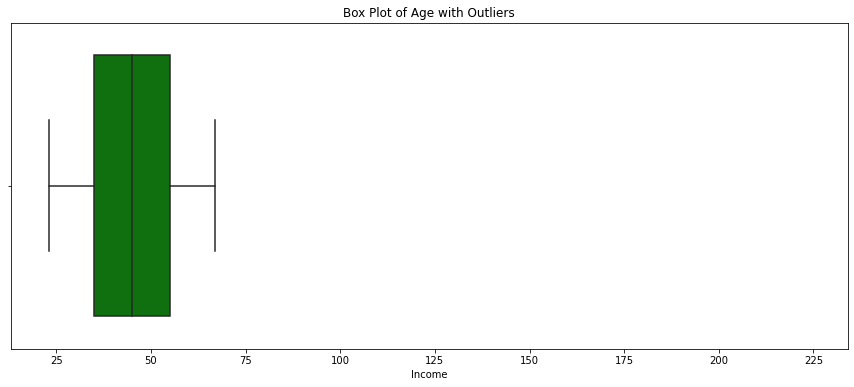

In [339]:
plt.figure(figsize=(15, 6))

# Create the box plot
sns.boxplot(x=age, color='green')

# Plot the outliers
for outlier in outliers:
    plt.scatter(outlier, 0, color='white', s=100)  # Adjust s for size of outlier markers

plt.xlabel('Income')
plt.title('Box Plot of Age with Outliers')
plt.show()

In [108]:
def plot_box_hist(data, column):
    """
    Plots a box plot and a histogram for a specified column in the DataFrame.
    
    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    column (str): The column name for which to plot the box plot and histogram.
    """
    # Create the subplots
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column of subplots

    # Plot the box plot in the first subplot
    sns.boxplot(x=data[column], color='violet', ax=ax[0])
    for outlier in outliers:
        plt.scatter(outlier, 0, color='white', s=100) 
        ax[0].set_title(f'Box Plot of {column}')
    
    # Plot the histogram in the second subplot
    sns.histplot(data[column], bins=20, kde=False, color='blue', ax=ax[1])
    ax[1].set_title(f'Histogram of {column}')
    
    # Adjust the layout
    plt.tight_layout()

    # Show the plots
    plt.show()

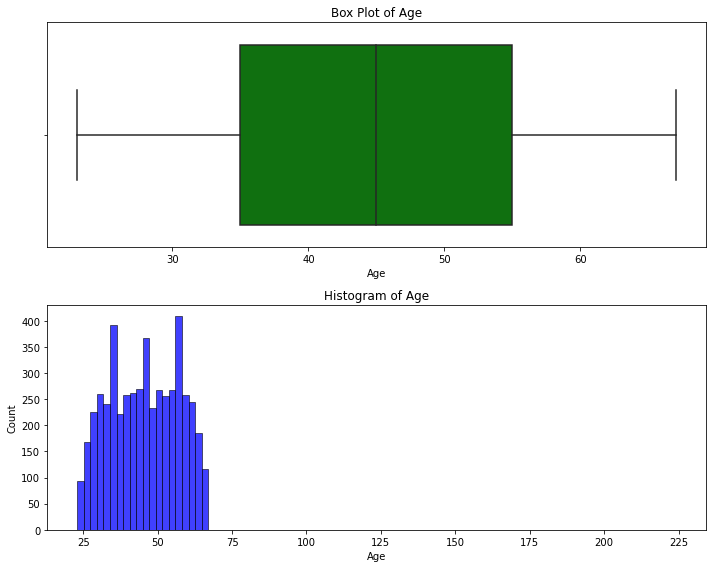

In [107]:
plot_box_hist(data,'Age')

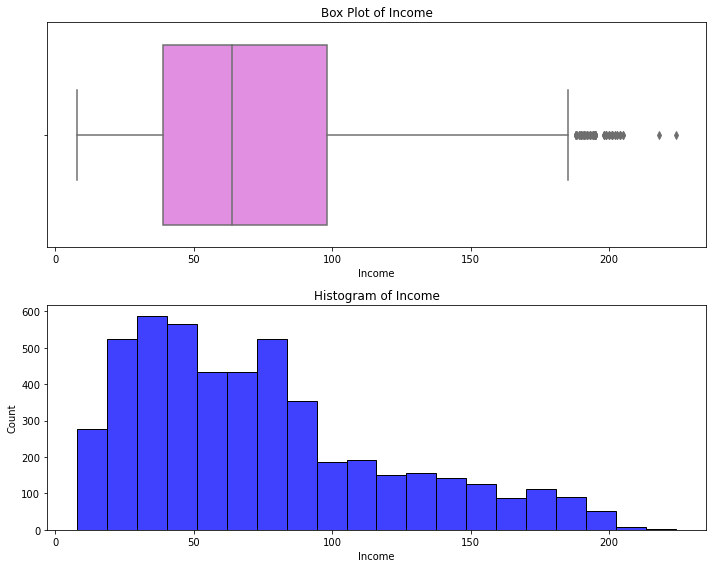

In [109]:
plot_box_hist(data,'Income')

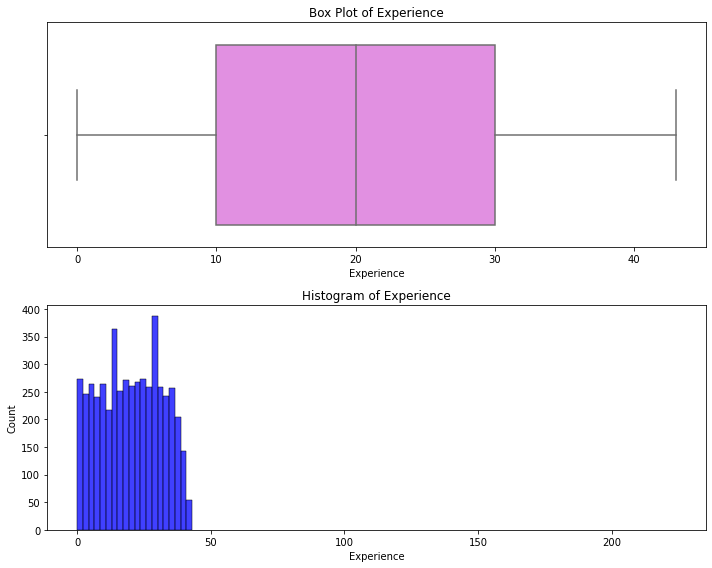

In [110]:
plot_box_hist(data,'Experience')

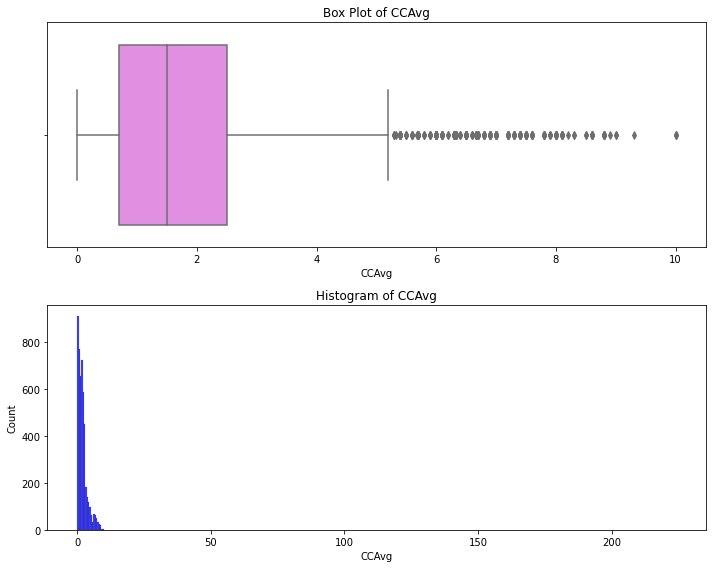

In [111]:
plot_box_hist(data,'CCAvg')

In [120]:
def plot_bar_with_percentages(data, column, perc=True):
    """
    Plots a bar plot with percentages or counts on top for a specified column in the DataFrame.
    
    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    column (str): The column name for which to plot the bar plot.
    perc (bool): If True, display percentages. If False, display counts.
    """
    if perc:
        # Calculate the percentage distribution
        count_data = data[column].value_counts(normalize=True) * 100
    else:
        # Calculate the count distribution
        count_data = data[column].value_counts()

    # Create the bar plot
    plt.figure(figsize=(8, 4))  # Smaller figure size
    bar_plot = sns.barplot(x=count_data.index, y=count_data.values, palette='viridis')

    # Annotate the bars with the values
    for index, value in enumerate(count_data.values):
        if perc:
            bar_plot.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')
        else:
            bar_plot.text(index, value + 0.5, f'{int(value)}', ha='center', va='bottom')

    # Set plot title and labels
    title = f'Percentage Distribution of {column}' if perc else f'Count Distribution of {column}'
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Percentage' if perc else 'Count')
    
    # Show the plot
    plt.show()

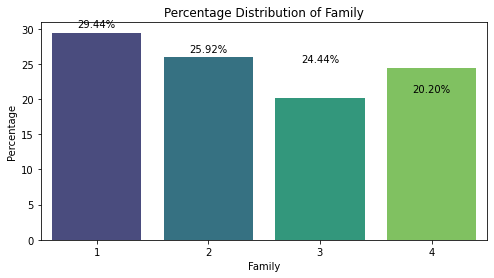

In [126]:
plot_bar_with_percentages(data,'Family')

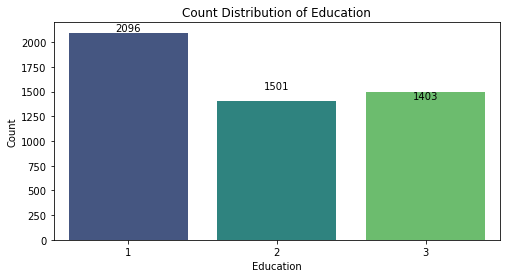

In [127]:
plot_bar_with_percentages(data,'Education',perc=False)

In [129]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [130]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Exploratory Data Analysis

In [131]:


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

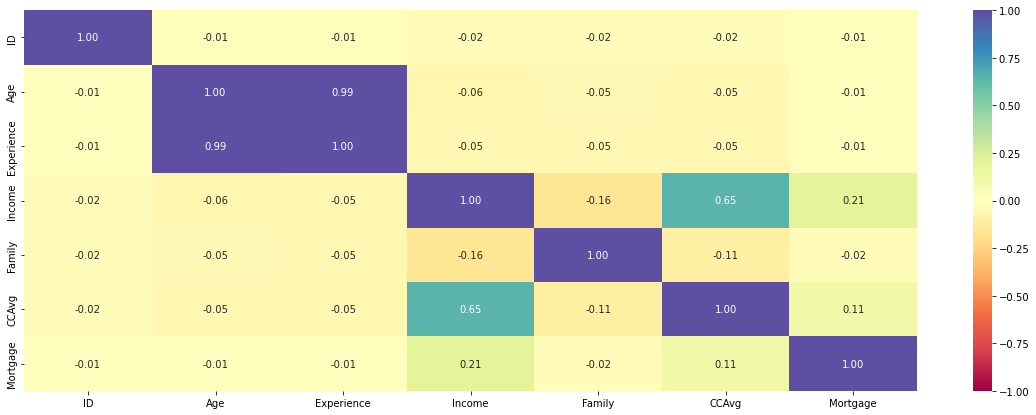

In [344]:

plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

 ### Question  
 1. What is the distribution of mortage attribute ? Are there any noticeble patterns or outliers in the distribution ?  
 
 

In [163]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [164]:
data['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [186]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    
    print(tab1)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    
    # Plot the stacked bar chart
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5), colormap="viridis")
    
    # Set plot title and labels
    plt.title(f'Relationship between {predictor} and {target}')
    plt.xlabel(predictor)
    plt.ylabel('Proportion')
    
    # Adjust legend position
    plt.legend(title=target, loc="upper left", bbox_to_anchor=(1, 1))
    
    # Show the plot
    plt.tight_layout()
    plt.show()

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096


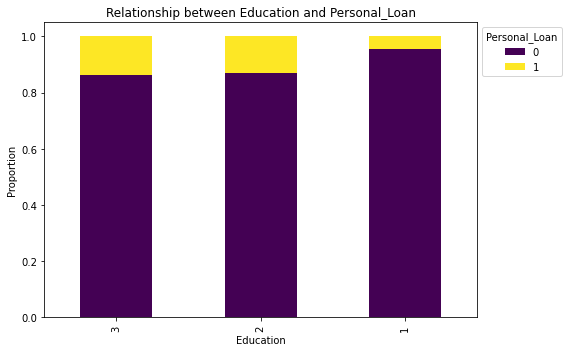

In [187]:
stacked_barplot(data,"Education",'Personal_Loan')

Family            1     2     3     4   All
Personal_Loan                              
All            1472  1296  1010  1222  5000
0              1365  1190   877  1088  4520
1               107   106   133   134   480


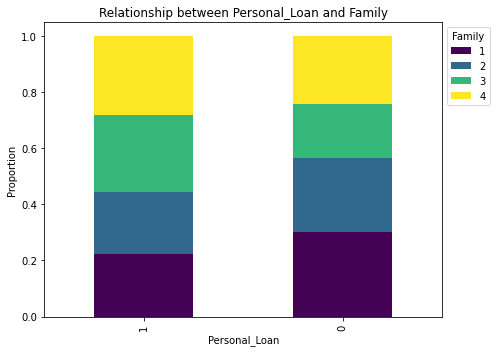

In [188]:
stacked_barplot(data,"Personal_Loan","Family")

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522


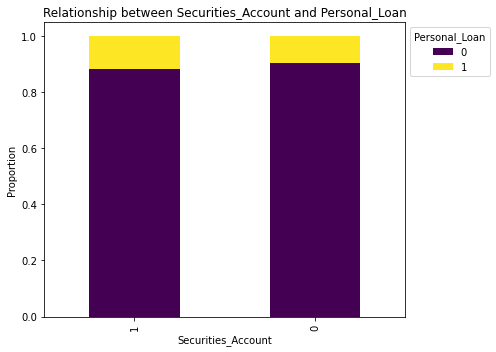

In [191]:
stacked_barplot(data,"Securities_Account","Personal_Loan")

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302


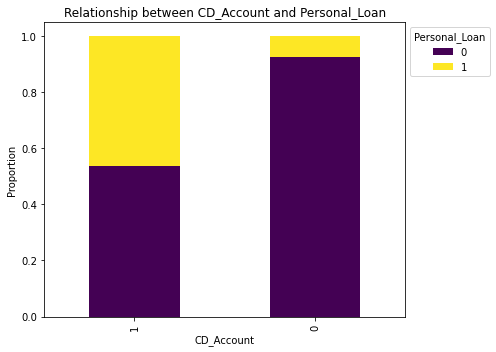

In [196]:
stacked_barplot(data,"CD_Account","Personal_Loan")

# Question : 
### How many customers have Credit Cards ? ### 

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470


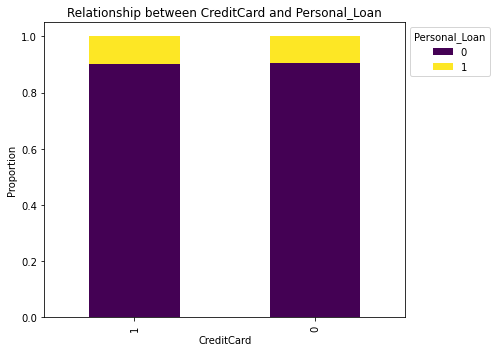

In [197]:
stacked_barplot(data,"CreditCard","Personal_Loan")

### Observation ### 

1. The number of people with Credit cards are : 143

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016


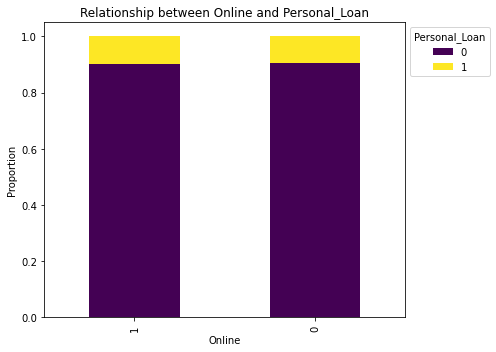

In [198]:
stacked_barplot(data,"Online","Personal_Loan")

ZIPCode         90   91   92   93    94   95  96   All
Personal_Loan                                         
All            703  565  988  417  1472  815  40  5000
0              636  510  894  374  1334  735  37  4520
1               67   55   94   43   138   80   3   480


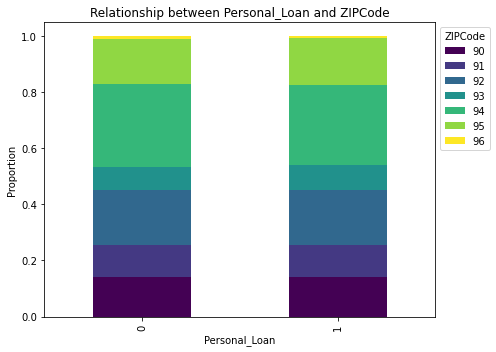

In [347]:
stacked_barplot(data,"Personal_Loan","ZIPCode")

## Question 

How does a customer's interest in purchasing a loan vary with their age?

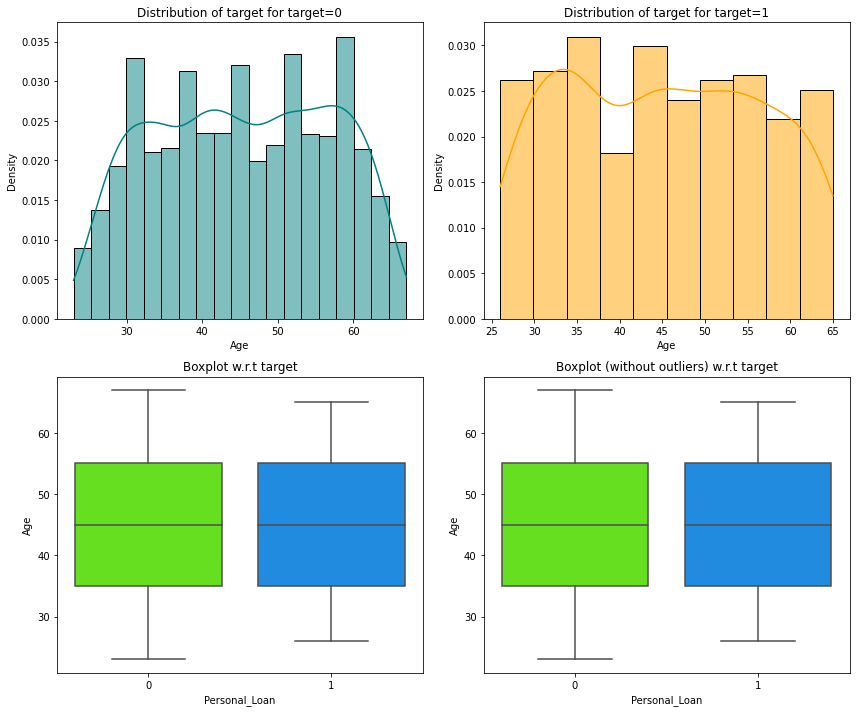

In [200]:
distribution_plot_wrt_target(data,"Age","Personal_Loan")

## Observation ## 

1. On the right hand side, the range starts from 30 where people have more years to work and have more chances of paying the personal loan with respect to their experience. 
2. As the data shows people in between 50 to 65 are less likely to get the personal loan as they will retire out of the job and chances of getting personal loan is less. 

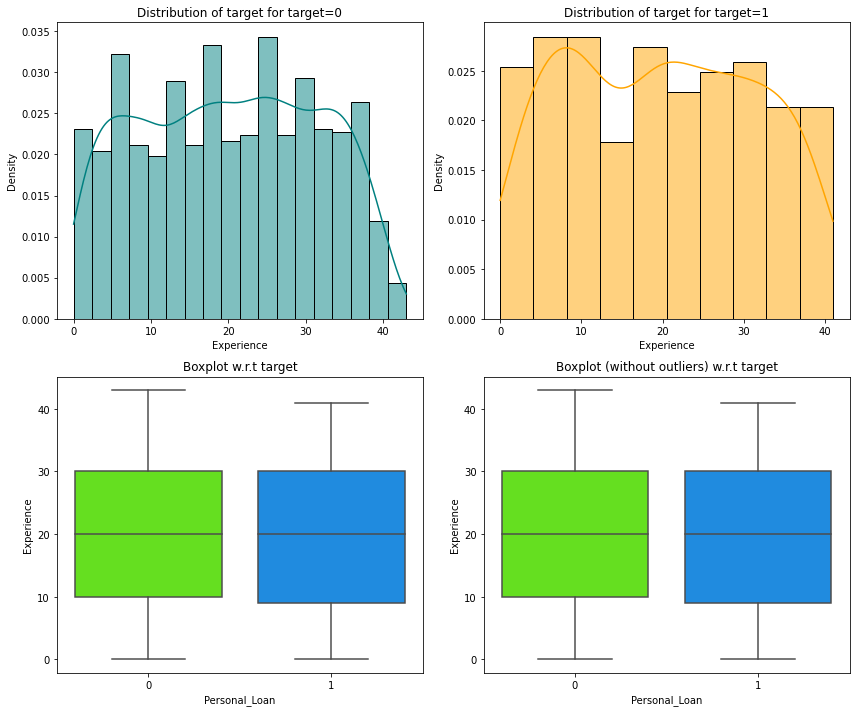

In [201]:
distribution_plot_wrt_target(data,"Experience","Personal_Loan")

### Question : 
What are the attributes that have a strong correlation with the target attribute (personal loan)?

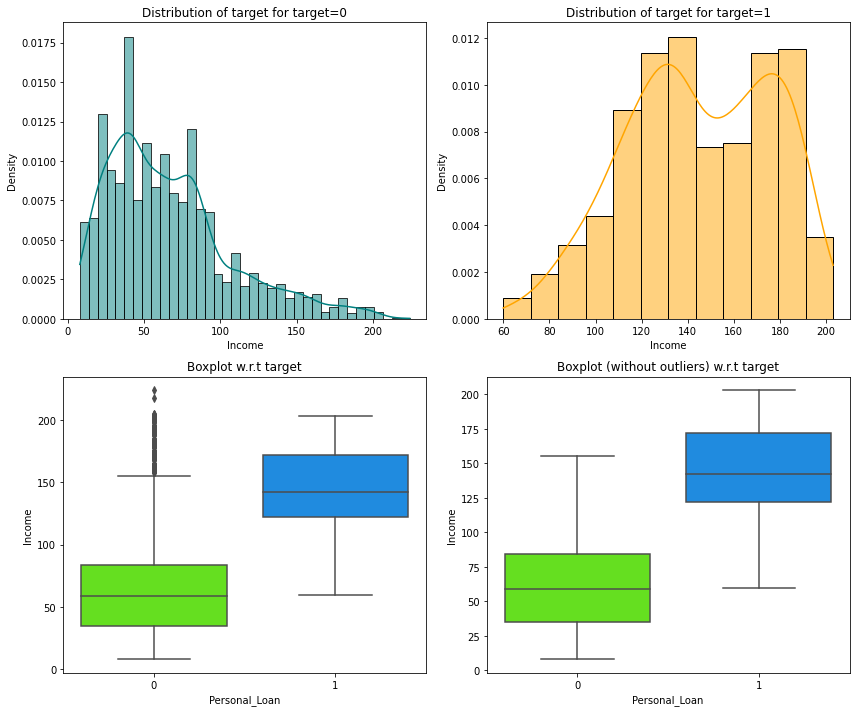

In [351]:
distribution_plot_wrt_target(data,"Income","Personal_Loan")

# Observation 

1. The strong co-relation with the target attribute is income as the personal loan of a person is determined by the income of the person. The more the income the chances of getting a loan is quite higher. The image on the right hand side determines it with KDE is the personal loan. 

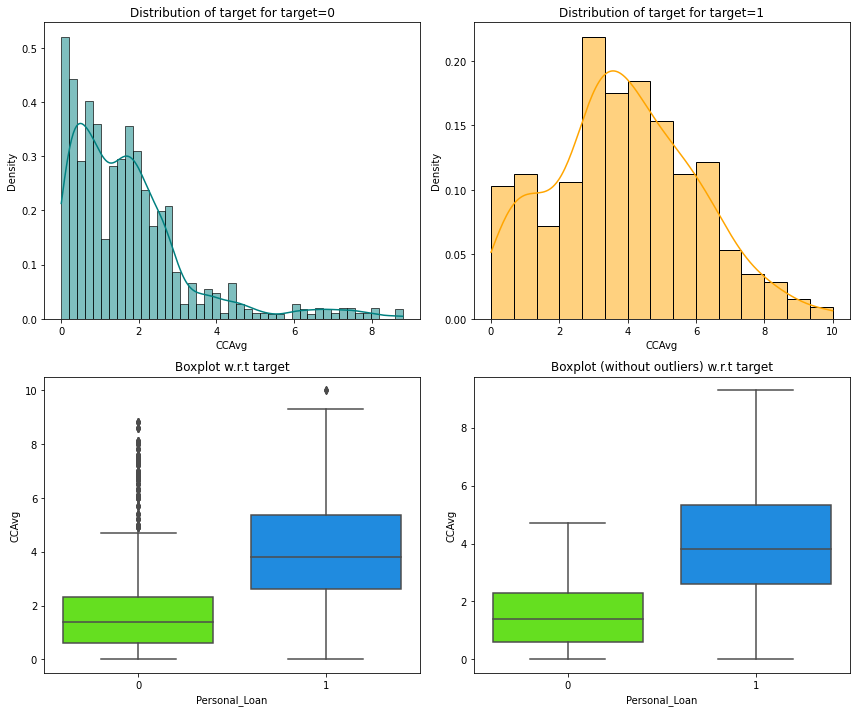

In [345]:
distribution_plot_wrt_target(data,"CCAvg","Personal_Loan")

# Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [205]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

## Observation : 
1. The observation shows there are no missing data or null value in each column. 

In [207]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [208]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

ID            0.00
Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

## Observation 

1. The above column shows the outlier percentile in each column. 

# Data Preparation for Modelling # 

In [352]:
X = data.drop(["Personal_Loan","Experience"], axis=1)
y = data["Personal_Loan"]

In [221]:
X = pd.get_dummies(X, columns =["ZIPCode","Education"], drop_first=True)


In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.30, random_state =1)

## Build Decision Tree Model ##

In [225]:
dTree = DecisionTreeClassifier(criterion ='gini', random_state=1)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree ## 

In [228]:
print("Accuracy on training set :", dTree.score(X_train,y_train))
print("Accuracy on test set :",dTree.score(X_test,y_test))

Accuracy on training set : 1.0
Accuracy on test set : 0.9833333333333333


## Observation #

1. We are using 70% of the data for training and 30% for Test data. 
2. We have calculated the accuracy and looks like they are very close with 1.0 and 0.98. Hence we would like to run the recall as accuracy may not be the perfect metric to be used. 

In [239]:
print("Shape of Training set:", X_train.shape)
print("Shape of Test set:", X_test.shape)
print("Shape of classes in Training set:",y_train.value_counts())
print("Shape of classes in Test set:",y_test.value_counts())

Shape of Training set: (3500, 18)
Shape of Test set: (1500, 18)
Shape of classes in Training set: 0    3169
1     331
Name: Personal_Loan, dtype: int64
Shape of classes in Test set: 0    1351
1     149
Name: Personal_Loan, dtype: int64


In [240]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

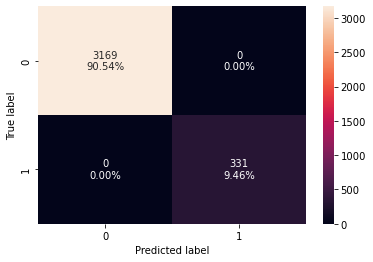

In [243]:
confusion_matrix_sklearn(dtree, X_train,y_train)

In [251]:
def get_recall_score(model):
    '''
    model : classifier to predict values of X
    
    '''
    pred_train = model.predict(X_train)
    pred_test  = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set:", metrics.recall_score(y_test,pred_test))

In [252]:
#recall values 

get_recall_score(dTree)


Recall on training set :  1.0
Recall on test set: 0.8926174496644296


# Visualizing the Decision Tree #

In [253]:
feature_names = list(X.columns)
print(feature_names)

['ID', 'Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


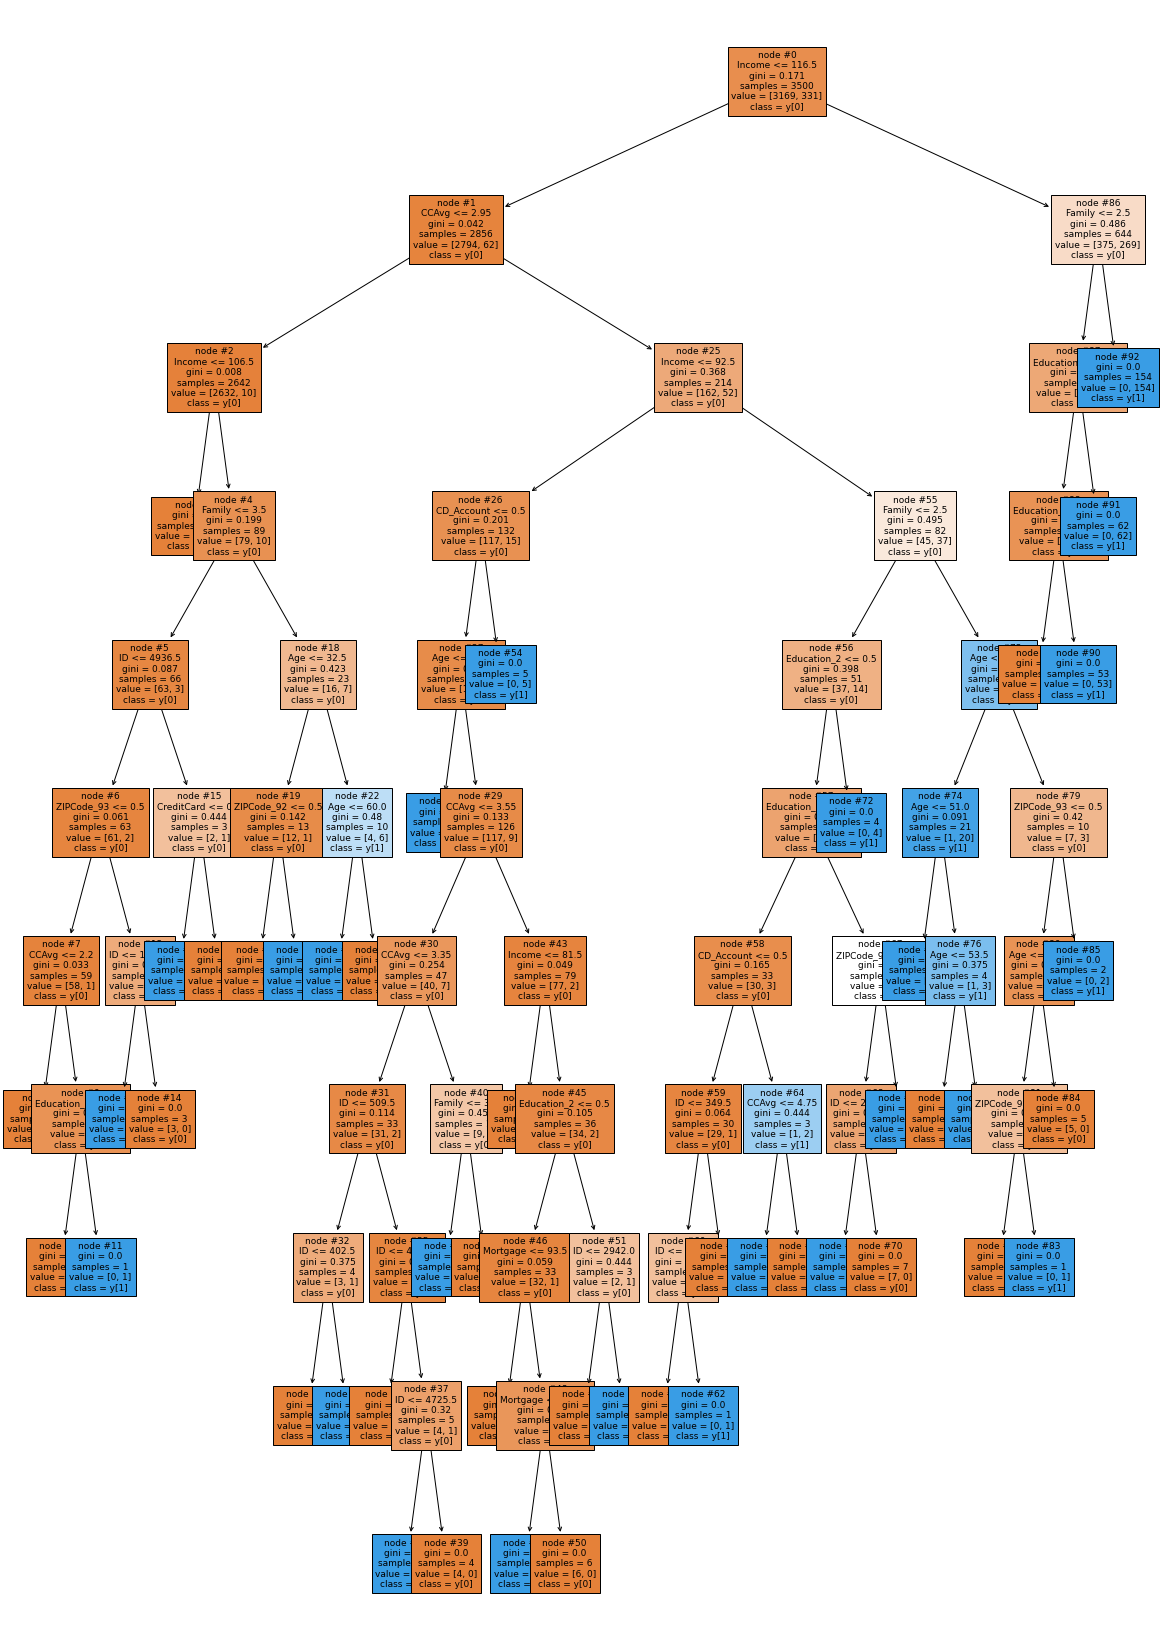

In [254]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [256]:
#Text report showing the rules of a decision tree

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ID <= 4936.50
|   |   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [51.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |   |--- ID <= 1627.00
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- ID >  1627.00
|   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |--- ID >  4936.50
|   |   |   |   |   |--- CreditCard <= 0.50
|  

In [282]:
print(pd.DataFrame(dTree.feature_importances_, columns =["Imp"], index = X_train.columns).sort_values(by='Imp', ascending=False))

                         Imp
Income              0.298018
Family              0.257587
Education_2         0.163412
Education_3         0.147127
CCAvg               0.044768
Age                 0.029516
ID                  0.020281
CD_Account          0.017273
ZIPCode_94          0.008713
ZIPCode_93          0.004766
Mortgage            0.003236
ZIPCode_92          0.003080
CreditCard          0.002224
Online              0.000000
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000


# Observation 

1. Income have more importance on the data followed by the family with the number of people. 
2. Education has also have some impact on the people getting the personal loan

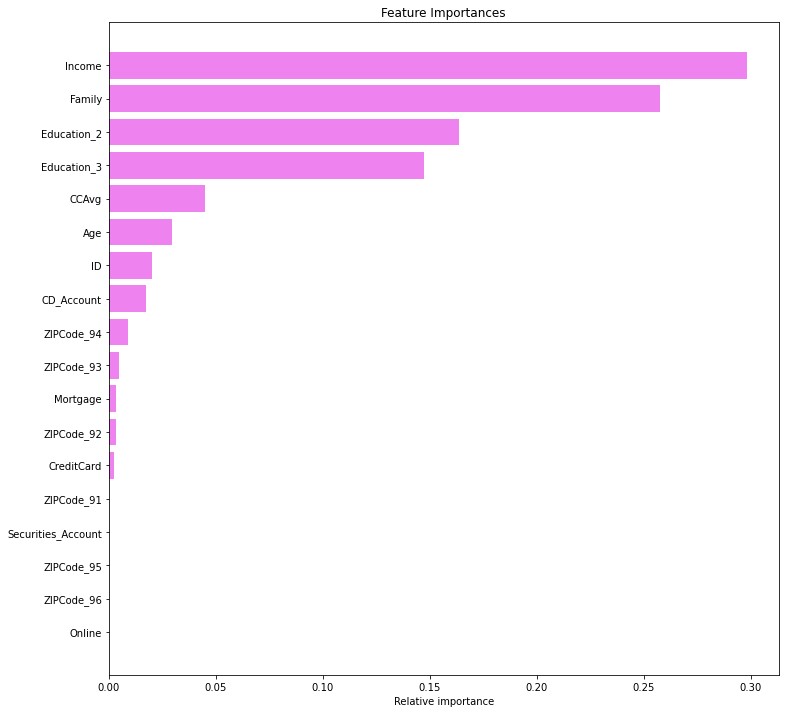

In [262]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color ='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

# Reduce Over Fitting # Pre Pruning

In [271]:
dTree1 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dTree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

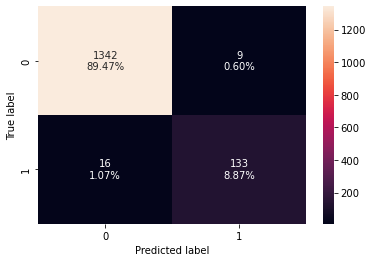

In [272]:
confusion_matrix_sklearn(dtree, X_test,y_test)

In [274]:
print("Recall on training set : ", dTree1.score(X_train,y_train))
print("Recall on test set:", dTree1.score(X_test, y_test))

get_recall_score(dTree1)

Recall on training set :  0.9671428571428572
Recall on test set: 0.9606666666666667
Recall on training set :  0.6525679758308157
Recall on test set: 0.6040268456375839


# Observation 

1. With Pre-puning we have reduced the maximum depth to 3 and we are using the Gini Criterion to understyand the impurities on the data. 
2. As the number of nodes have cut down, The training dataset shows 0.96 which the independent variable have 0.65 . The test data also shows the same similarities. 

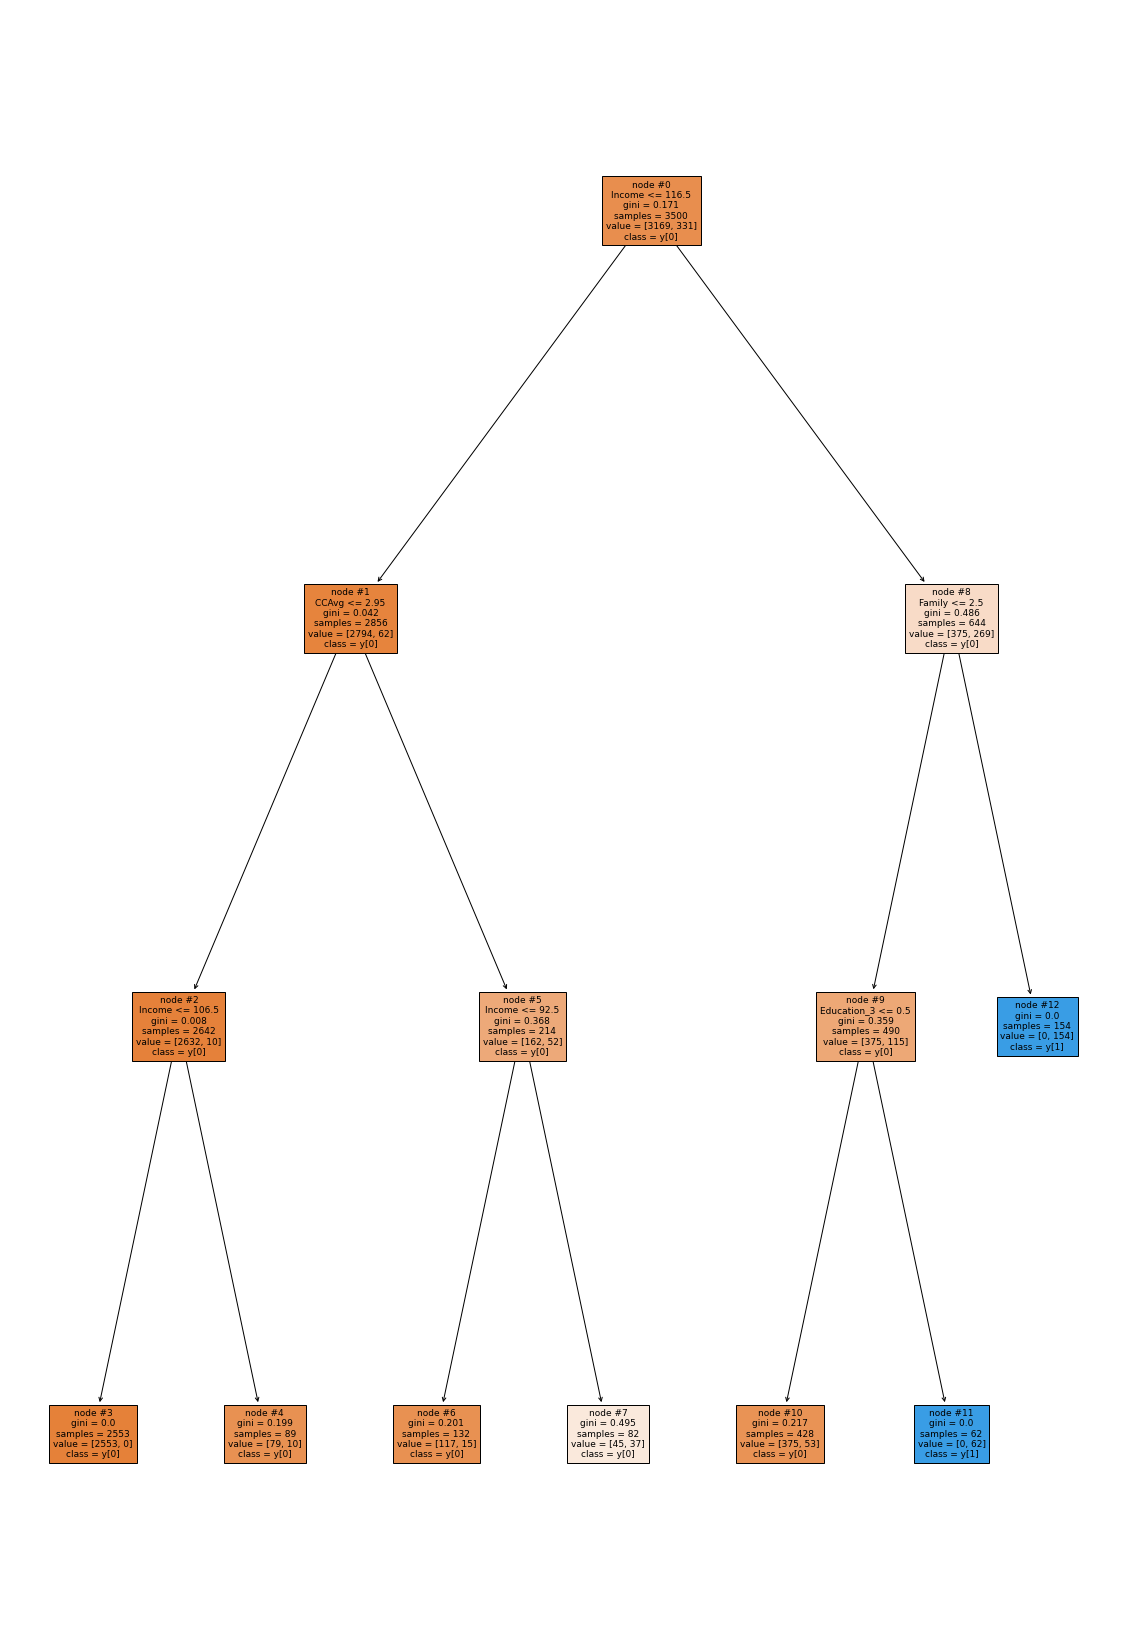

In [276]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [278]:
print(tree.export_text(dTree1, feature_names = feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- weights: [45.00, 37.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- weights: [375.00, 53.00] class: 0
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [0.00, 154.00] class: 1



In [281]:
print(pd.DataFrame(dTree1.feature_importances_, columns =["Imp"], index = X_train.columns).sort_values(by='Imp', ascending=False))

                         Imp
Income              0.423442
Family              0.325586
Education_3         0.197232
CCAvg               0.053740
ZIPCode_92          0.000000
Education_2         0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
ID                  0.000000
ZIPCode_91          0.000000
Age                 0.000000
Online              0.000000
CD_Account          0.000000
Securities_Account  0.000000
Mortgage            0.000000
CreditCard          0.000000


In [284]:


# Income              0.298018
# Family              0.257587
# Education_2         0.163412
# Education_3         0.147127
# CCAvg               0.044768
# Age                 0.029516
# ID                  0.020281
# CD_Account          0.017273
# ZIPCode_94          0.008713
# ZIPCode_93          0.004766
# Mortgage            0.003236
# ZIPCode_92          0.003080
# CreditCard          0.002224
# Online              0.000000
# Securities_Account  0.000000
# ZIPCode_91          0.000000
# ZIPCode_95          0.000000
# ZIPCode_96          0.000000
# 

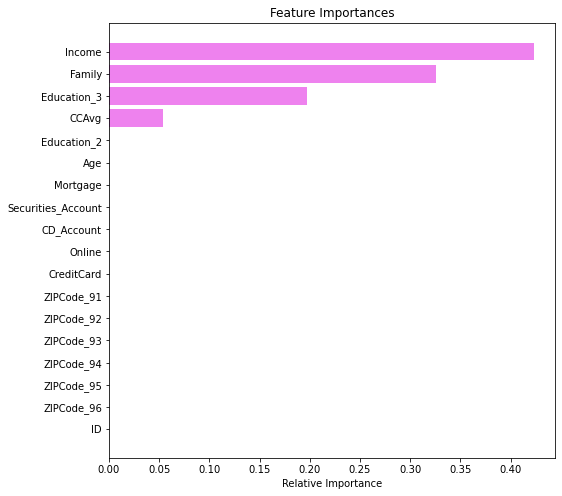

In [286]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# GridSearch Hyperarameter 

In [287]:
from sklearn.model_selection import GridSearchCV

In [288]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10, 15, 20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001, 0.01, 0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=10,
                       random_state=1)

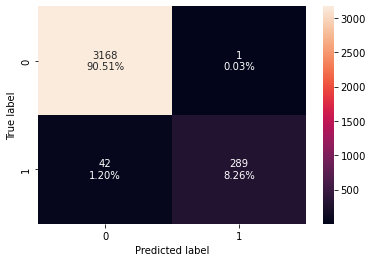

In [292]:
confusion_matrix_sklearn(estimator,X_train,y_train)

In [293]:
print("Accuracy on training set : ", estimator.score(X_train,y_train))
print("Accuracy on test set:", estimator.score(X_test, y_test))

get_recall_score(estimator)

Accuracy on training set :  0.9877142857142858
Accuracy on test set: 0.9786666666666667
Recall on training set :  0.8731117824773413
Recall on test set: 0.785234899328859


# Obsevation
1. With the hyperparameter applied on the list of max depth, max leaf nodes, impurity decreases the train data show 0.98 and the improvement on the indpendent variable personal loan 0.87

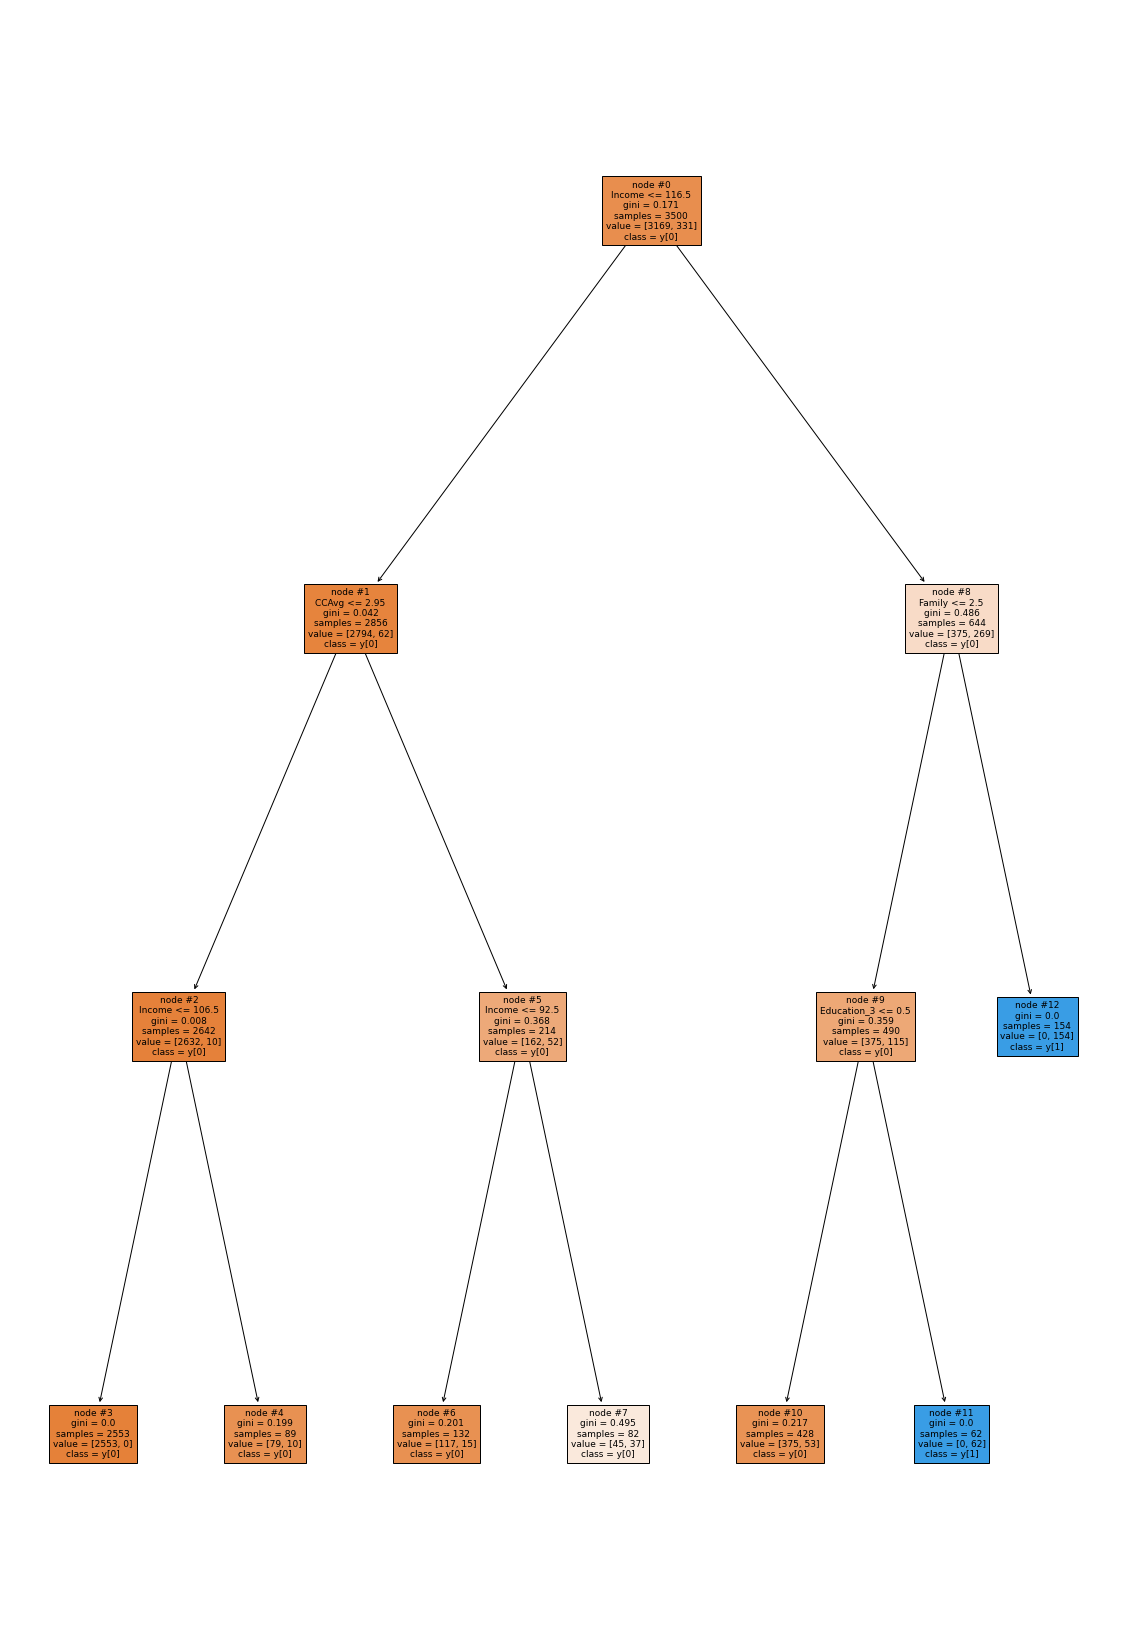

In [294]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [295]:
print(tree.export_text(estimator, feature_names = feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |--- weights: [1.00, 20.00] class: 1
|   |   |   |   |--- Age >  57.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [0.00, 154.00] class: 1



In [296]:
print(pd.DataFrame(estimator.feature_importances_, columns =["Imp"], index = X_train.columns).sort_values(by='Imp', ascending=False))

                         Imp
Income              0.334949
Family              0.276718
Education_2         0.176412
Education_3         0.157935
CCAvg               0.043032
Age                 0.010953
ZIPCode_92          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
ID                  0.000000
ZIPCode_91          0.000000
Online              0.000000
CD_Account          0.000000
Securities_Account  0.000000
Mortgage            0.000000
CreditCard          0.000000


# Introducing Alpha

In [297]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [298]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000223,0.001114
2,0.000250,0.001614
3,0.000268,0.002688
4,0.000272,0.003232
5,0.000273,0.004868
6,0.000276,0.005420
7,0.000381,0.005801
8,0.000527,0.006329
9,0.000625,0.006954


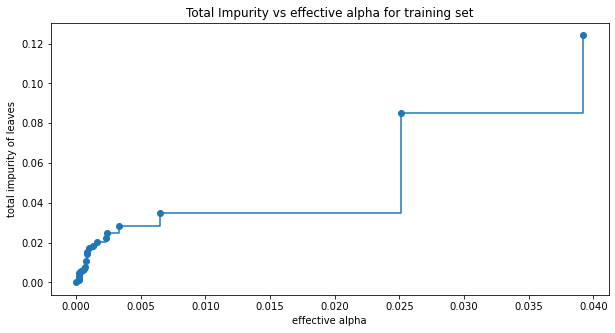

In [299]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [300]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


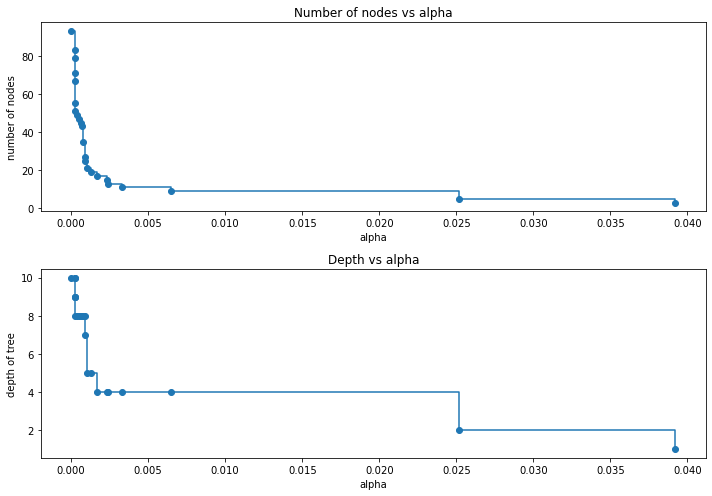

In [301]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

 # Accuracy vs Alpha #

In [302]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

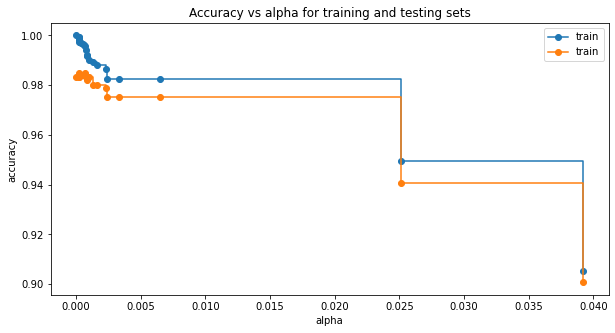

In [304]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="train", drawstyle="steps-post")
ax.legend()
plt.show()


In [305]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model:', best_model.score(X_train, y_train))
print('Test accuracy of best model:',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00027210884353741507, random_state=1)
Training accuracy of best model: 0.9982857142857143
Test accuracy of best model: 0.9846666666666667


# since accuracy isnt the right metric for our data we want high recall #

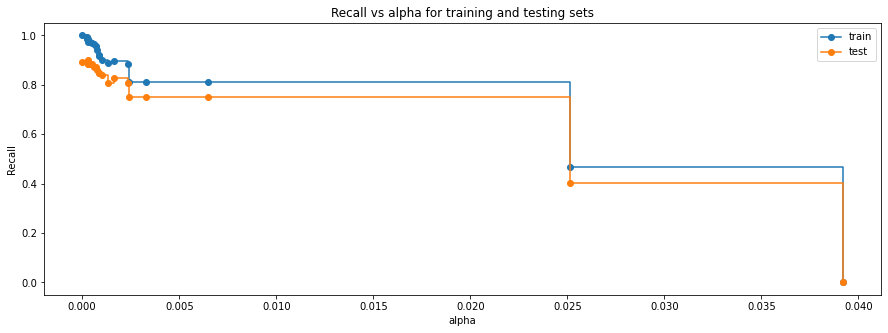

In [306]:
 recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [307]:
index_best_model = np.argmax(recall_test)
best_model =clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00027210884353741507, random_state=1)


In [311]:
get_recall_score(best_model)

Recall on training set :  0.9848942598187311
Recall on test set: 0.8993288590604027


# Observation : 
1. With the introducting the cc alpha the value of the alpha increases the impurities increase as well. The trainig data set is 0.98 and the test set is 0.899 with an increase of 0.02

# Post Pruning 

In [312]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.00027210884353741507, class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00027210884353741507,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

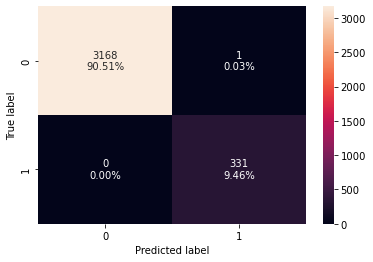

In [314]:
confusion_matrix_sklearn(estimator_2,X_train,y_train) 

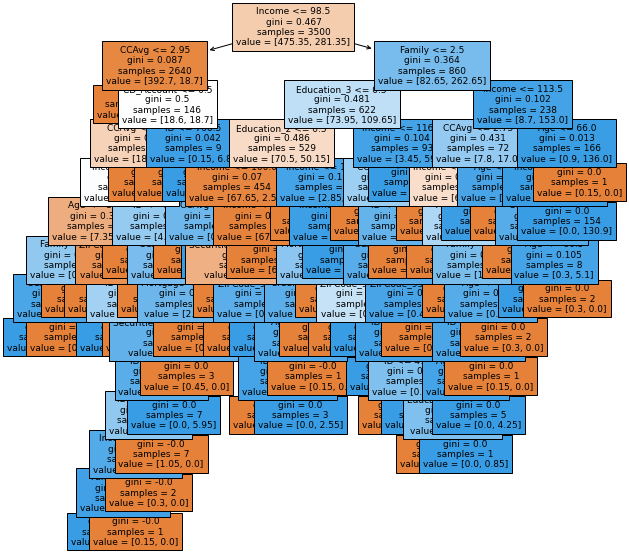

In [315]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [316]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.15, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |--- ID <= 2043.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- ID >  2043.50
|   |  

In [317]:
print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.593704
Education_2         0.136801
CCAvg               0.078498
Education_3         0.066939
Family              0.065630
ID                  0.016482
Age                 0.015917
CD_Account          0.011009
Securities_Account  0.004589
Mortgage            0.003723
ZIPCode_91          0.003320
ZIPCode_93          0.002744
CreditCard          0.000646
Online              0.000000
ZIPCode_92          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000


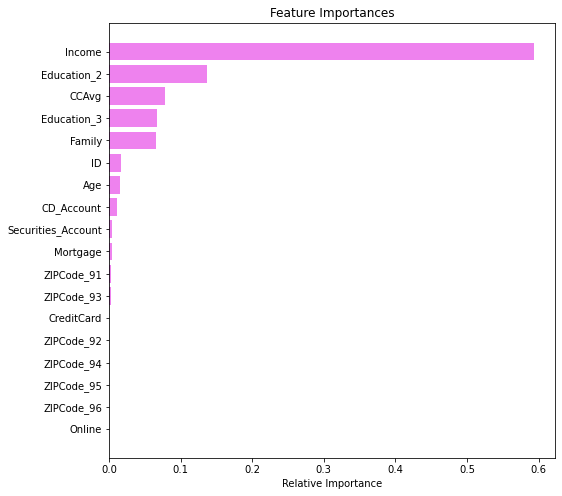

In [318]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

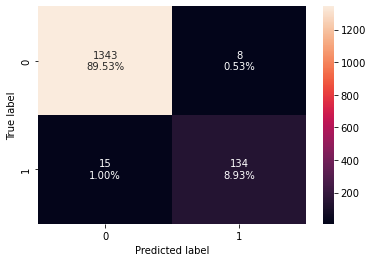

In [320]:
confusion_matrix_sklearn(best_model,X_test,y_test)

In [321]:
get_recall_score(best_model)

Recall on training set :  0.9848942598187311
Recall on test set: 0.8993288590604027


# Model Comparison #

In [355]:
compariosn_frame = pd.DataFrame({'Model':['Initial Decision Tree Model','Decision Tree with Restricted Max Depth',"Decision Tree with HyperParameter Tuning",'Decision tree with post pruning'], 'Train_Recall':[1.0,0.96,0.98,0.98],'Test_Recall':[0.89,0.65,0.87,0.89]})
compariosn_frame

,Model,Train_Recall,Test_Recall
0,Initial Decision Tree Model,1.00,0.89
1,Decision Tree with Restricted Max Depth,0.96,0.65
2,Decision Tree with HyperParameter Tuning,0.98,0.87
3,Decision tree with post pruning,0.98,0.89


# Observation 

1. Initial Decision Tree Model and Decision Tree with Post Pruning have the highest recall 0.89. These models should be used for deployment and target customers to get more conversion on people getting the personal loan 
2. The post pruning method have mitigated the issue of overfitting concern
3. Hyper parameter tunning have showed good performance of 0.87 but it did not outperform the post pruning model.

Conclusion 
1. The Decision Tree with Post Pruning is recommended for deployment due to its high and stable performance on both the training and test data. This ensures a reliable model for business decision making while minizing overfitting risk. 